# Note:
    columns(Excel) == variables(Statistics) == features(ML & AI) == fields(SQL)

# Datacleaning
    (1) Drop the columns which has all unique values. 
    Ex: s.no, id, mobile n.o, pan n.o, adhaar n.o
    (2) Bad data:
        (2.1) wrong data
        (2.2) data in wrong format
        (2.3) duplicates
        (2.4) empty or misssing values
        (2.5) outliers

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'Age':[15,18,'18',19.4,'20+'],'Gender':['male','female','female','female','male']})
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20+,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     5 non-null      object
 1   Gender  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [4]:
df['Age'].unique()

array([15, 18, '18', 19.4, '20+'], dtype=object)

# Wrong data:
    solution: replace with correct data

In [5]:
df['Age'] = df['Age'].replace({'20+':20})
df

,Age,Gender
0,15,male
1,18,female
2,18,female
3,19.4,female
4,20,male


In [6]:
df['Age'] = df['Age'].replace({15: 25, 18: 28})
df

,Age,Gender
0,25,male
1,28,female
2,18,female
3,19.4,female
4,20,male


In [7]:
df['Age'] = df['Age'].replace({15: 25, 28: 18})
df

,Age,Gender
0,25,male
1,18,female
2,18,female
3,19.4,female
4,20,male


In [8]:
df.dtypes

Age       object
Gender    object
dtype: object

# Data in wrong format:
    solution: convert to orginal format

In [9]:
df['Age'] = df['Age'].astype('float')
df.dtypes

Age       float64
Gender     object
dtype: object

# Duplicates:
    solution: if there is any data entry mistake then replace with original data, Otherwise remove the record from dataset

In [10]:
df

,Age,Gender
0,25.0,male
1,18.0,female
2,18.0,female
3,19.4,female
4,20.0,male


In [11]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [12]:
df.duplicated().sum()

1

In [13]:
df[df.duplicated()]

,Age,Gender
2,18.0,female


In [14]:
df[~df.duplicated()]

,Age,Gender
0,25.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [15]:
df.drop_duplicates()

,Age,Gender
0,25.0,male
1,18.0,female
3,19.4,female
4,20.0,male


In [16]:
df = df.drop_duplicates(ignore_index=True)
df

,Age,Gender
0,25.0,male
1,18.0,female
2,19.4,female
3,20.0,male


# Empty or missing values:
    (1) Extract the particular record and observe the missing values
        --> if each and every value of record is missing, then drop the record
    (2) calculate the percentage of missing values of each column
        --> if percentage of missing value of the column > 30%, then drop the column
        --> if percentage of missing value of the column < 30%, then replace
        replace:
        --------
        (1) if possible collect the original data and replace it
        (2) continuous           : mean(no outliers), median(outliers)
        (3) discrete count       : mode
        (4) discrete categorical : mode

In [17]:
df = pd.DataFrame({'Age':[15,np.nan,24,19,20,22], 'Gender': ['male',np.nan,'female','female',np.nan,'male'] })
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [18]:
df.isnull()

,Age,Gender
0,False,False
1,True,True
2,False,False
3,False,False
4,False,True
5,False,False


In [19]:
df.isnull().sum()

Age       1
Gender    2
dtype: int64

In [20]:
df.isnull().sum()/len(df)

Age       0.166667
Gender    0.333333
dtype: float64

In [21]:
df['Age'].isnull()

0    False
1     True
2    False
3    False
4    False
5    False
Name: Age, dtype: bool

In [22]:
df[df['Age'].isnull()]

,Age,Gender
1,NaN,NaN


In [23]:
df[df['Age'].isnull()].index

Index([1], dtype='int64')

In [24]:
df[df['Age'].isnull()].index[0]

1

In [25]:
df = df.drop(index=1)
df

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [26]:
df = pd.DataFrame({'Age':[15,np.nan,24,19,20,22], 'Gender': ['male',np.nan,'female','female',np.nan,'male'] })
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [27]:
df.dropna()

,Age,Gender
0,15.0,male
2,24.0,female
3,19.0,female
5,22.0,male


In [28]:
df = pd.DataFrame({'Age':[15,np.nan,24,19,20,22], 'Gender': ['male',np.nan,'female','female',np.nan,'male'] })
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [29]:
df.drop(columns='Gender')

,Age
0,15.0
1,NaN
2,24.0
3,19.0
4,20.0
5,22.0


In [30]:
df = pd.DataFrame({'Age':[15,np.nan,24,19,20,22], 'Gender': ['male',np.nan,'female','female',np.nan,'male'] })
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [31]:
df['Age'].fillna(2)

0    15.0
1     2.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [32]:
df.fillna(2)

,Age,Gender
0,15.0,male
1,2.0,2
2,24.0,female
3,19.0,female
4,20.0,2
5,22.0,male


In [33]:
df = pd.DataFrame({'Age':[15,np.nan,24,19,20,22], 'Gender': ['male',np.nan,'female','female',np.nan,'male'] })
df

,Age,Gender
0,15.0,male
1,NaN,NaN
2,24.0,female
3,19.0,female
4,20.0,NaN
5,22.0,male


In [34]:
df['Age'].mean()

20.0

In [35]:
df['Age'].fillna(df['Age'].mean())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [36]:
df['Age'].median()

20.0

In [37]:
df['Age'].fillna(df['Age'].median())

0    15.0
1    20.0
2    24.0
3    19.0
4    20.0
5    22.0
Name: Age, dtype: float64

In [38]:
df['Gender'].mode()

0    female
1      male
Name: Gender, dtype: object

In [39]:
df['Gender'].fillna(df['Gender'].mode()[0])

0      male
1    female
2    female
3    female
4    female
5      male
Name: Gender, dtype: object

# Outliers:
    (1) remove : least priority
        (Q) why we should not remove outliers?
        if we remove outliers from column, but sometimes still we have outliers. Beacuse statistical measures like Q1,Q3,IQR will update as per new data
    (2) replace:
        --> if possible collect the original data and replace it
        --> Otherwise replace it statistically(Winsorization Technique) i.e replace the outliers by lower limit and upper limit
    (3) retrain:
        --> do analysis by including them

In [40]:
df = pd.DataFrame({'marks': [10,11,12,25,25,27,31,33,34,34,36,36,43,50,59]})
df

,marks
0,10
1,11
2,12
3,25
4,25
5,27
6,31
7,33
8,34
9,34


In [41]:
df['marks'].quantile(0)

10.0

In [42]:
Q1 = df['marks'].quantile(0.25)
Q1

25.0

In [43]:
Q2 = df['marks'].quantile(0.5)
Q2

33.0

In [44]:
Q3 = df['marks'].quantile(0.75)
Q3

36.0

In [45]:
IQR = Q3-Q1
IQR

11.0

In [46]:
ll = Q1-(1.5*IQR)
ll

8.5

In [47]:
Ul = Q3+(1.5*IQR)
Ul

52.5

In [48]:
df[(df['marks']<ll)|(df['marks']>Ul)]

,marks
14,59


<Axes: xlabel='marks'>

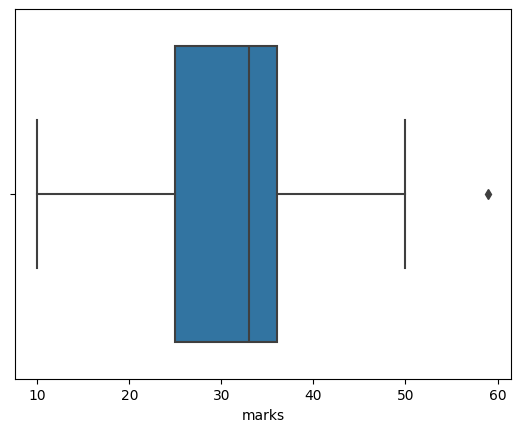

In [49]:
import seaborn as sns
sns.boxplot(x=df['marks'])

In [50]:
df['marks'].clip(lower=8.5, upper=52.5)

0     10.0
1     11.0
2     12.0
3     25.0
4     25.0
5     27.0
6     31.0
7     33.0
8     34.0
9     34.0
10    36.0
11    36.0
12    43.0
13    50.0
14    52.5
Name: marks, dtype: float64

In [51]:
df['marks'] = df['marks'].clip(lower=8.5, upper=52.5)
df

,marks
0,10.0
1,11.0
2,12.0
3,25.0
4,25.0
5,27.0
6,31.0
7,33.0
8,34.0
9,34.0
